### 목표
- 타이타닉 데이터를 학습해서 생존/사망자 예측해 보자!
- 머신러닝의 전체 과정을 이해하며 진행하자!
- kaggle 경진대회에서 높은 순위를 차지해 보자!

## 머신러닝 7과정

### 1. 문제정의(목표설정 / 생존자 예측)
 - 타이타닉 데이터를 학습해서 생존자와 사망자 예측

### 2. 데이터 수집 (kaggle에서 다운)
- kaggle 데이터 활용
- train,test 불러오기

In [1]:
#도구 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # 시각화 라이브러리(plt보다 시각적으로 좀 더 다채로움)


In [2]:
#titanic 트레인, 테스트 데이터 불러오기
#변수명 train, test
#인덱스를 'PassengerId'로 설정

train = pd.read_csv('data/titanic_train.csv', index_col='PassengerId')
test = pd.read_csv('data/titanic_test.csv', index_col='PassengerId')

In [3]:
display(train.head())
test.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


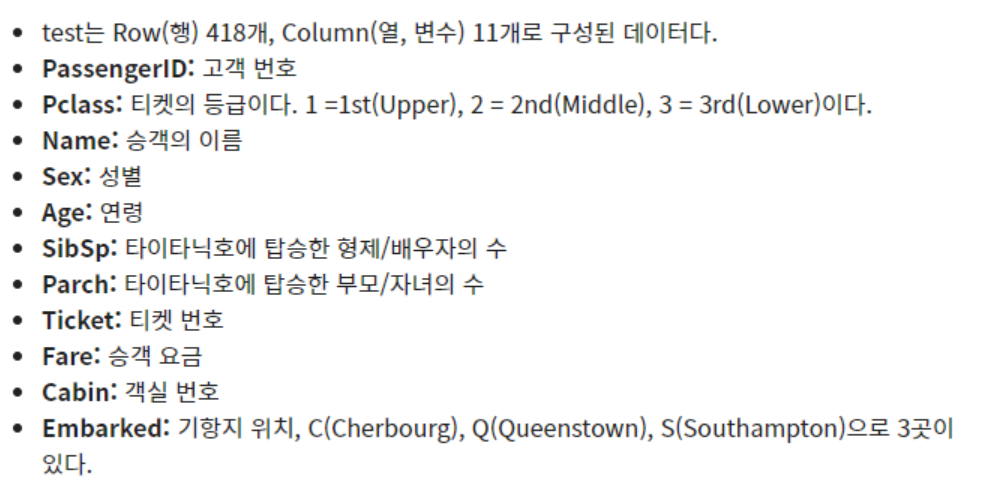

In [4]:
#데이터 크기확인
print("훈련용 데이터 : ",train.shape)
print("테스트용 데이터 : ",test.shape)

#컬럼 수가 다른 이유? 테스트용에 답(y)이 없으므로. kaggle 대회 제출용이기 때문.
#test_y는 캐글이 가지고 있는 것. 바로 아래 같은 모양!

훈련용 데이터 :  (891, 11)
테스트용 데이터 :  (418, 10)


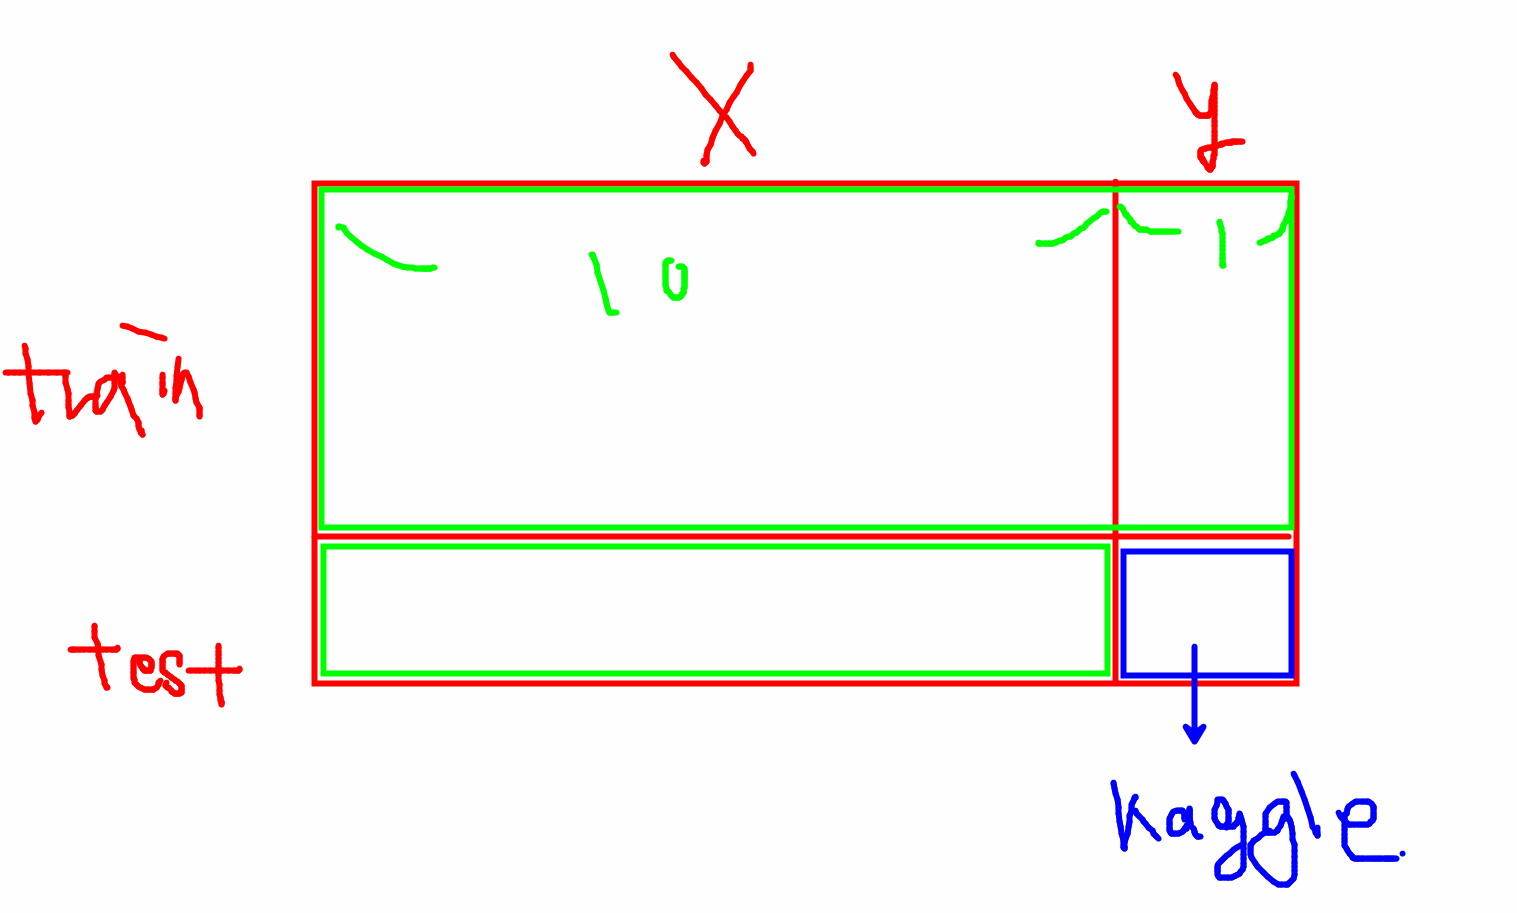

### 3. 데이터 전처리
- 결측치, 이상치 제거

In [5]:
#결측치, 이상치 확인
train.info()

test.info()

#결측치가 있으면 머신러닝 학습 불가능. 채워주든가 뺴든가 해야 한다.
#train : Age, Cabin, Embarked
#test : Age, Cabin, Fare

#데이터 타입 확인 > 머신러닝 학습을 위해 숫자형태로 변환(인코딩)

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    f

- 결측치를 단순 기술통계량으로 채우지 않고 컬럼간의 특성과 상관관계를 이용해서 결측치를 채워주자!


In [6]:
#기술통계량 확인
train['Age'].describe()
#총 714개 데이터
#평균 약 29 최대 80
#앞쪽에 치우쳐져 있는 데이터 형태
#제2사분위수(=중간치)와 평균 비슷 : 이상치는 없어 보인다.

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [7]:
#문자열 데이터 기술통계량 확인
train['Cabin'].describe()

count         204
unique        147
top       B96 B98
freq            4
Name: Cabin, dtype: object

In [8]:
#조건을 줘서 위 B96 B98 Cabin에 묵었던 인원 확인해 보자
#데이터 추출>인덱싱, 슬라이싱(인덱스): 인덱스를 알아야 한다. 
#인덱스 번호 현재 모름!
#조건을 통해서 참인 값들만 추출: 불리언 인덱싱

#데이터[조건]

train[train['Cabin']=="B96 B98"]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
391,1,1,"Carter, Mr. William Ernest",male,36.0,1,2,113760,120.0,B96 B98,S
436,1,1,"Carter, Miss. Lucile Polk",female,14.0,1,2,113760,120.0,B96 B98,S
764,1,1,"Carter, Mrs. William Ernest (Lucile Polk)",female,36.0,1,2,113760,120.0,B96 B98,S
803,1,1,"Carter, Master. William Thornton II",male,11.0,1,2,113760,120.0,B96 B98,S


In [9]:
#탑승구 확인
train['Embarked'].describe()
#결측치 2개
#가장 많이 탑승한 항구는 S

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [10]:
#train 데이터에서 S항구에서 탑승한 인원 추출
train[train['Embarked']=='S'].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


In [11]:
#test 데이터의 기술통계량(Age, Fare, Cabin)

display(test['Age'].describe())
#평균값과 중위수 차이가 적음. 앞쪽에 많이 분포된 데이터.train의 Age와 유사. 데이터 분리 잘 되어 있다!

display(test['Fare'].describe())
#평균값과 중위수 차이 큼. 다수가 낮은 요금 지불.max 값이 너무 크다. 이상치 아닐까? 의심.

display(test['Cabin'].describe())
#중복되지 않은 유일한 값들이 고루 분포. 

#의미가 없어보이니 컬럼을 제거할까?
#삭제는 최후의 방법으로 사용

count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

count                  91
unique                 76
top       B57 B59 B63 B66
freq                    3
Name: Cabin, dtype: object

#### 결측치 채우기
    - Age 컬럼의 결측치를 채워보자!
    - 분포 치우쳐져 있는 것을 확인 > 평균으로 채우게 되면 신뢰성 하락
    - 다른 컬럼들과 상관관계를 이용해서 결측치를 상세하게 채워보자!

In [12]:
# 상관관계 확인
train.corr(numeric_only=True)

#-는 음의 상관관계. 양수는 양의 상관관계.
#-1이나 1에 가까울수록 관계가 높은 것이며 0에 가까울수록 관계가 없다.

#Age 데이터와 생존여부에 높은 상관관계를 가지는 Pclass 컬럼을 활용해 보자
#관련있는 성별 데이터도 함께 활용해서 Age 데이터 결측치를 채워보자!
#기본지식, 상관관계, 기술통계량 등을 활용해서 결측치를 채우는 것을 추천

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


### 상관관계
- -1 ~ 1 사이의 숫자 출력
- -1에 가까울 수록 음의 상관관계, 1에 가까울수록 양의 상관관계
- 0에 가까울 수록 관계가 없음.
- 숫자가 절대값 1에 가까울 수록 관련이 높은 컬럼
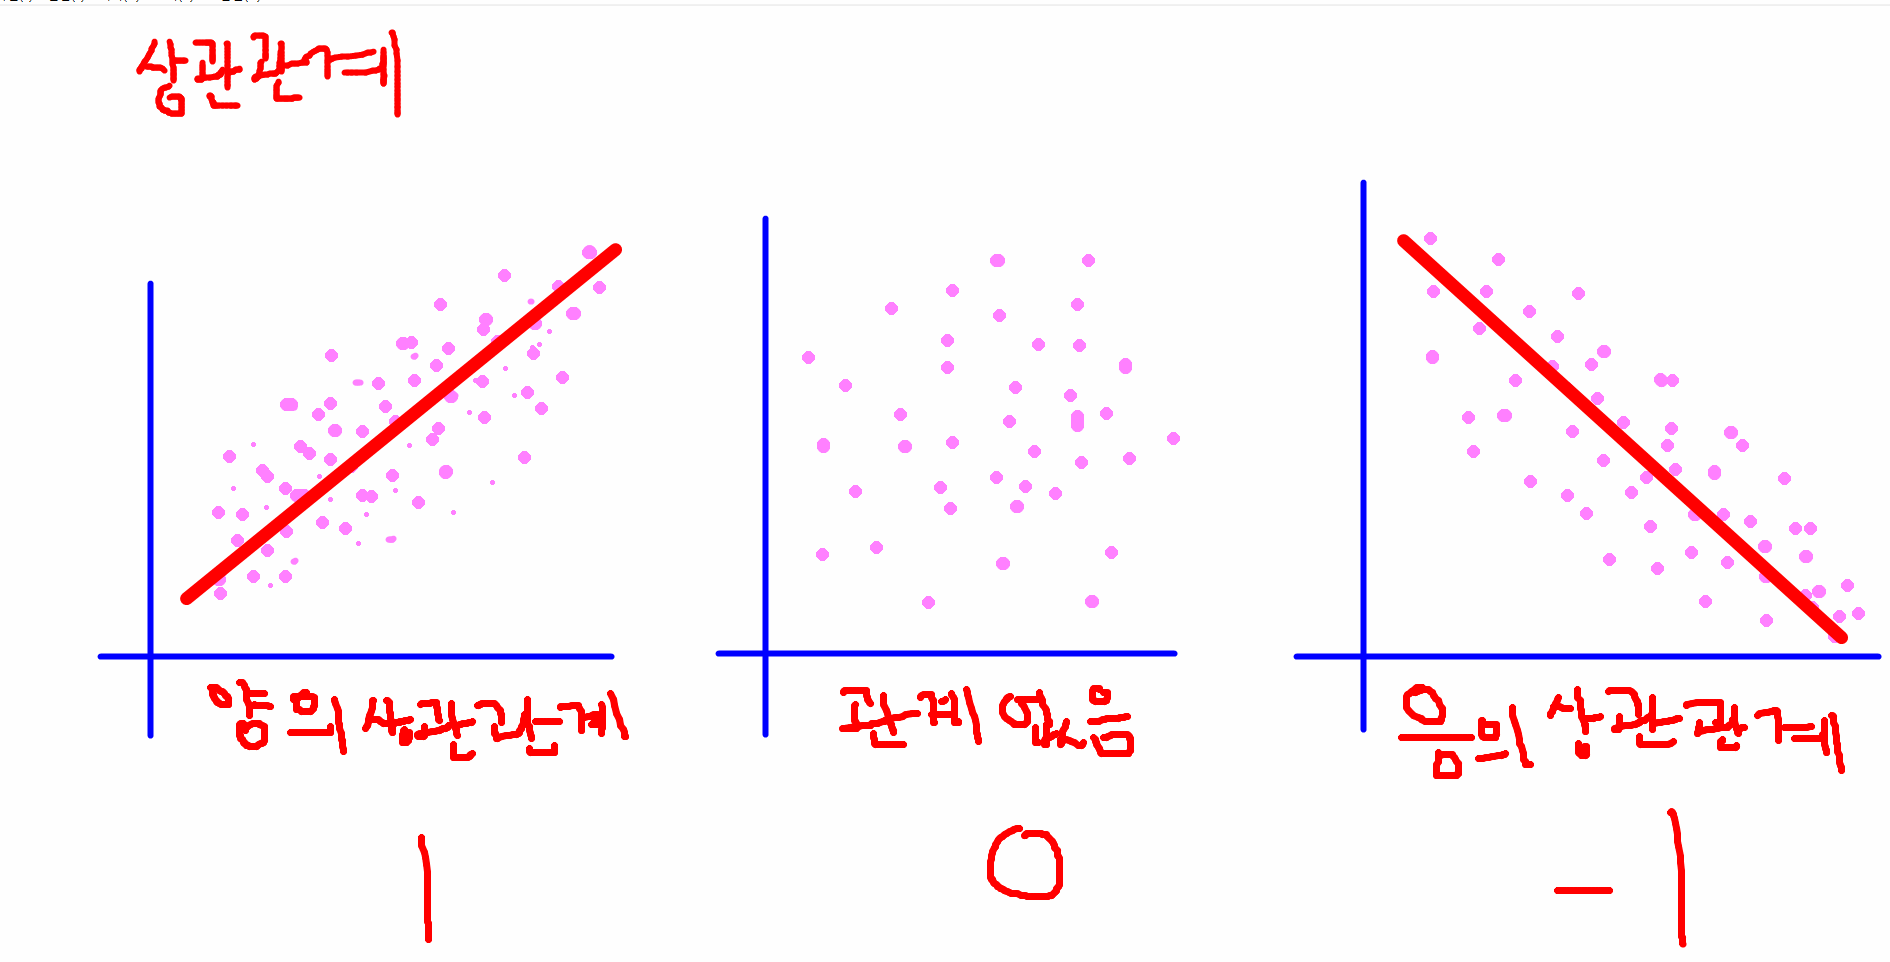

In [13]:
# 피봇테이블 : 컬럼들의 요약된 정보를 출력할 수 있게 해 주는 표
train_pivot = train.pivot_table(values='Age', #데이터로 사용할 컬럼
                 index = ['Pclass','Sex'],#데이터 요약시 사용할 컬럼
                  aggfunc='mean') #평균 출력

train_pivot

#각 객실등급별, 성별로 나이 평균을 출력
#결측치를 채울 때 단순평균으로 채우는 것보다는 관련있는 값으로 세분화해서 채워주기

Age
Pclass Sex              
1      female  34.611765
       male    41.281386
2      female  28.722973
       male    30.740707
3      female  21.750000
       male    26.507589

In [14]:
# 다중인덱싱/멀티인덱싱 - > 두 개 이상의 인덱스가 존재할 때 인덱싱 하는 방법
# df.loc[(앞 인덱스, 뒤 인덱스),컬럼]

# 1등급 여성 데이터 출력
train_pivot.loc[(1,'female'),"Age"]

# 3등급 남성 데이터 출력
train_pivot.loc[(3,'male'),'Age']

# 2등급 여성 데이터 출력
train_pivot.loc[(2,'female'),'Age']

28.722972972972972

In [15]:
# Age 결측치를 처리하는 함수 정의
def fill_age(data):
    #만약 Age 컬럼에 결측치가 있다면 피봇 테이블에서 값을 찾아서 출력해줘
    if pd.isna(data['Age']):
        return train_pivot.loc[(data['Pclass'],data['Sex']),"Age"]
    # 그렇지 않으면 원래 값을 출력해줘
    else:
        return data['Age']

In [16]:
# 위 함수를 우리의 train에 적용
# apply() : DataFrame에서 행 또는 열에 함수를 적용할 때 사용한다.
#DataFrame명.apply(함수이름, 축설정)

train['Age'] = train.apply(fill_age, axis = 1).astype('int64') #컬럼에 적용할 것이므로 axis = 1, 너무 숫자가 기니까 정수하

train['Age']

PassengerId
1      22
2      38
3      26
4      35
5      35
       ..
887    27
888    19
889    21
890    26
891    32
Name: Age, Length: 891, dtype: int64

In [17]:
pt_test_age = test.pivot_table(values = 'Age',
                              index= ['Pclass','Sex'],
                              aggfunc = 'mean')

In [18]:
def fill_test_age(data):
    if pd.isna(data['Age']):
        return pt_test_age.loc[(data['Pclass'],data['Sex']),'Age']
    else:
        return data['Age']

In [19]:
test['Age'] = test.apply(fill_test_age, axis = 1).astype('int64')
test['Age']

PassengerId
892     34
893     47
894     62
895     27
896     22
        ..
1305    24
1306    39
1307    38
1308    24
1309    24
Name: Age, Length: 418, dtype: int64

- train의 Embarked 채우기
    - 결측치 2개

In [20]:
#데이터 확인해봤더니 가장 많이 승선한 항이 's'항구
train['Embarked'].describe()
#결측치 양(2개)에 비해 뚜렷한 데이터가 존재하므로
#'S'데이터로 채워주기!
#데이터가 많으면 많을수록 한두 개의 데이터는 별 영향 없다.

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [21]:
#다른 항구의 개수도 확인
train['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [22]:
#결측치를 'S'로 채워주기
#fillna(지정값) : 지정값으로 결측치를 채워주는 함수
train['Embarked']= train['Embarked'].fillna('S')

- test의 Fare 컬럼 결측치 채우기
    - 1개의 결측치

In [23]:
test['Fare'].describe()
#평균 : 35, 최대값 : 512 앞쪽에 데이터가 몰려 있는 형태
#전체 평균으로 채우기엔 신뢰성이 떨어진다.
#상관관계 확인

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

In [24]:
#Fare 상관관계 확인
test.corr(numeric_only=True)

,Pclass,Age,SibSp,Parch,Fare
Pclass,1.000000,-0.530062,0.001087,0.018721,-0.577147
Age,-0.530062,1.000000,-0.079450,-0.056587,0.353202
SibSp,0.001087,-0.079450,1.000000,0.306895,0.171539
Parch,0.018721,-0.056587,0.306895,1.000000,0.230046
Fare,-0.577147,0.353202,0.171539,0.230046,1.000000


In [25]:
#피봇 테이블로 상관관계 확인
#Pclass, Sex 데이터를 통해 Fare 평균값을 확인

pv_test_fare = test.pivot_table(values = 'Fare',
                             index = ['Pclass','Sex'],
                             aggfunc = 'mean')
pv_test_fare

Fare
Pclass Sex               
1      female  115.591168
       male     75.586551
2      female   26.438750
       male     20.184654
3      female   13.735129
       male     11.826350

In [26]:
#비어있는 값이 1개이므로 함수 작성하지 않고 test에서 비어있는 값만 출력 채워주기
#isnull() 또는 isna 사용하기

test[test['Fare'].isnull()]
test[pd.isna(test['Fare'])==True]



,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60,0,0,3701,NaN,NaN,S


In [27]:
#3등급 남성의 요금 평균을 가져와서 채워주기!
test['Fare']= test['Fare'].fillna(11.826350)

In [28]:
#확인
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    int64  
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      418 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 35.9+ KB


### Cabin 결측치 처리 (train, test 둘 다 처리)
- Cabin 문자열
- Cabin 컬럼은 실제 데이터보다 결측치가 더 많음.(컬럼 자체를 삭제하는 것도 한 방법)
- 시각화를 통해서 삭제여부를 결정


In [29]:
#중복없이 값 출력
train['Cabin'].unique()
#전체적으로 데이터 중복이 없는 편
#모든 값들이 알파벳을 가지고 있는 것을 확인 : 알파벳 규칙 
#알파벳(층 의미)만 추출

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [30]:
#train, test 데이터 모두에 결측치에는 임의의 알파벳 'M'(mistery) 채우기
#'Deck' 새로운 컬럼을 생성해 주기 - 기존 Cabin 컬럼 손상 막기 위해
train['Deck'] = train['Cabin'].fillna('M')
test['Deck'] = test['Cabin'].fillna('M')

train['Deck']
test['Deck']

PassengerId
892        M
893        M
894        M
895        M
896        M
        ... 
1305       M
1306    C105
1307       M
1308       M
1309       M
Name: Deck, Length: 418, dtype: object

In [31]:
#'Deck' 컬럼에서 알파벳만 출력
train['Deck'] = train['Deck'].str[0]
test['Deck'] = test['Deck'].str[0]

train['Deck']
test['Deck']

PassengerId
892     M
893     M
894     M
895     M
896     M
       ..
1305    M
1306    C
1307    M
1308    M
1309    M
Name: Deck, Length: 418, dtype: object

In [32]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
 11  Deck      891 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 90.5+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    o

In [33]:
#Cabin 컬럼 삭제
train = train.drop('Cabin', axis = 1) #이렇게 다시 대입을 해주거나
test.drop('Cabin',axis = 1, inplace = True) #자동으로 대입을 해 주는 inplace 속성을 주면 된다.

#이미 삭제되었으니까 이 명령 다시 실행하면 오류남! 나중에 착오하지 말자.
#처음부터 전체 실행하는 거면 상관없음

### 4. EDA (탐색적 데이터 분석) - 기술통계 확인, 변수간 상관관계 파악, 시각화 등
- train, test 존재
- train 데이터를 이용하여 탐색을 해야 한다
- test로 탐색을 하는 건 일반화에 도움이 되지 않음

- Deck 시각화

In [34]:
#Deck 데이터는 결측치가 많은 컬럼
# ㄴ M이라고 하는 임의의 값으로 채워줌
#  ㄴ 컬럼 삭제 여부 결정 위해 시각화

#피벗 테이블 생성

pt_deck_check = train.pivot_table(values = 'Name',  #이건 Deck와 Survived로 확인하기 위한 거니까 아무 컬럼이든 노상관.
                  index = ['Deck','Survived'],
                 aggfunc = 'count')



<Axes: xlabel='Deck', ylabel='count'>

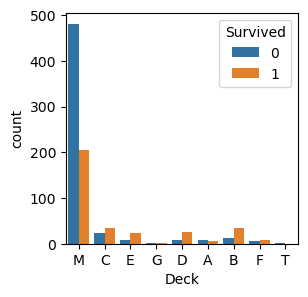

In [35]:
# M 데이터 사망자 수가 월등히 많다
# 시각화를 통해서 눈으로 확인

plt.figure(figsize=(3,3)) #사이즈 줄여서 보기

#생존/사망자 수로 Deck 데이터 분류
sns.countplot(data=train,    
             x = 'Deck',
             hue = 'Survived')

# M에 죽은 사람의 비율이 높음
# 생존여부에 활용을 해보도록 하겠다!

<Axes: xlabel='Pclass', ylabel='count'>

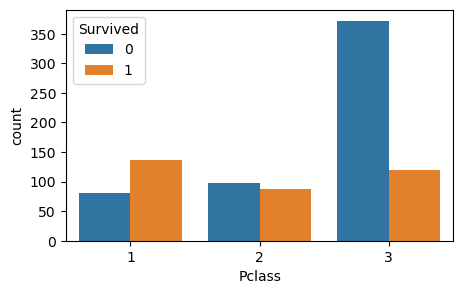

In [36]:
#Pclass 데이터 생존여부와의 관계
#counplot 그리고 해석해 보기
plt.figure(figsize=(5,3))
sns.countplot(data= train, 
             x = 'Pclass',
             hue = 'Survived')


#생존자 수 자체는 등급과 무관하게 비슷.
#1등급 - 생존률이 높음
#2등급 - 비교적 사망률이 높음
#3등급 - 월등히 사망률이 높음
#3등급 사망률이 높은 것 확인 : 가장 하층부에 위치하기 때문에 탈출 힘들었음

<Axes: xlabel='Deck', ylabel='count'>

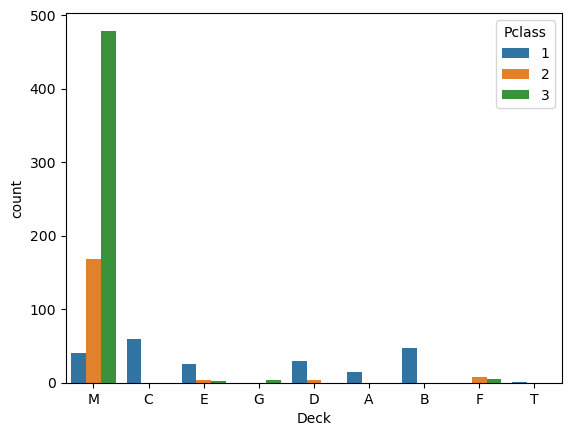

In [37]:
#Pclass와 Deck의 상관관계 시각적으로 확인
sns.countplot(data=train, x='Deck', hue = 'Pclass' )

#Deck가 M인 사람이 3등급이 많고 사망자 비율도 높다

In [38]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S,M
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S,M
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S,C
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S,M


<Axes: xlabel='Sex', ylabel='count'>

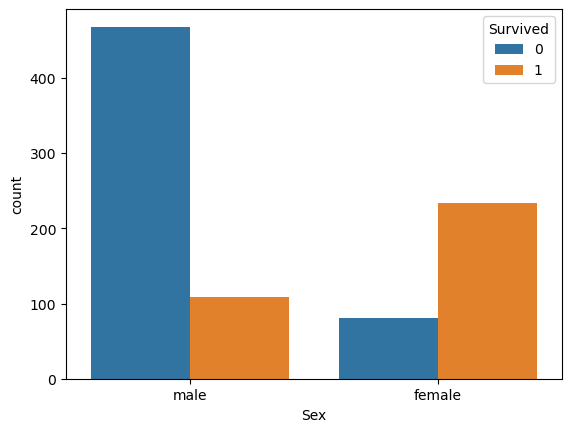

In [39]:
# 확인해보고 싶은 컬럼 countplot 그려보기!
#Sex, Survived 관계
#plt.figure(figsize=(3,3))
sns.countplot(data= train, x= 'Sex', hue='Survived')
#여자의 생존율이 높다

<Axes: xlabel='Age', ylabel='count'>

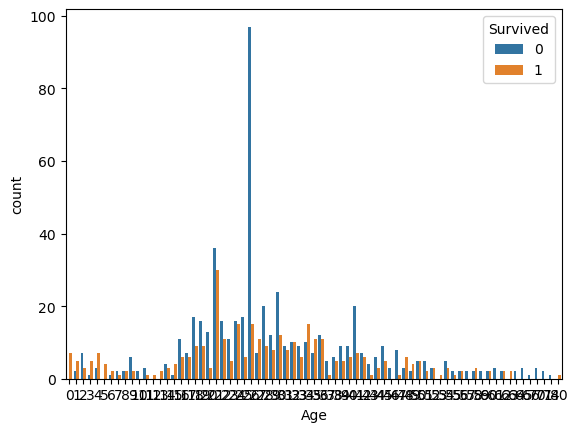

In [40]:
#Age 데이터 확인
sns.countplot(data = train, x = 'Age', hue = 'Survived')

#너무 나이가 다양함. 그래프를 그리는 의미가 없다.

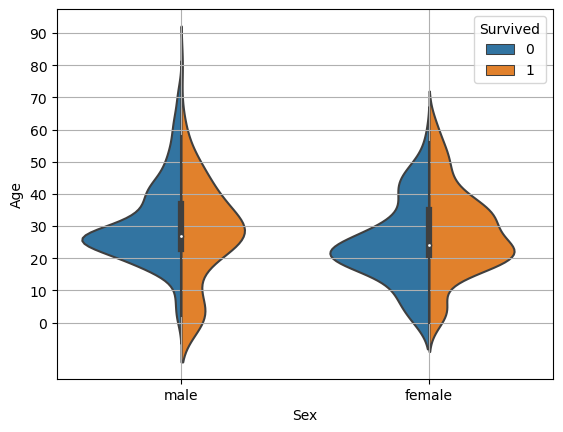

In [41]:
#수치데이터의 분포를 파악할 때 사용
#바이올린 플롯
#바이올린 형태로 데이터의 분포와 밀도를 곡선으로 표현해 주는 그래프
#데이터가 많이 분포하는 부분은 두껍게 출력, 적게 분포하는 부분은 얇게 표현된다.

#sns.violinplot(data=train, x='Sex',y='Age',hue='Survived')

#그래프가 4개나 되어 헷갈린다면?

sns.violinplot(data=train, x='Sex',y='Age',hue='Survived', split=True) #나눠서 합쳐주기
plt.yticks(range(0,100,10)) #y축 눈금
plt.grid()


#20대부터 40대까지의 분포가 넓음 -> 탑승자가 많다.
#나이가 어린 사람들 중에서는 남자아이가 여자아이에 비해 생존률이 높음

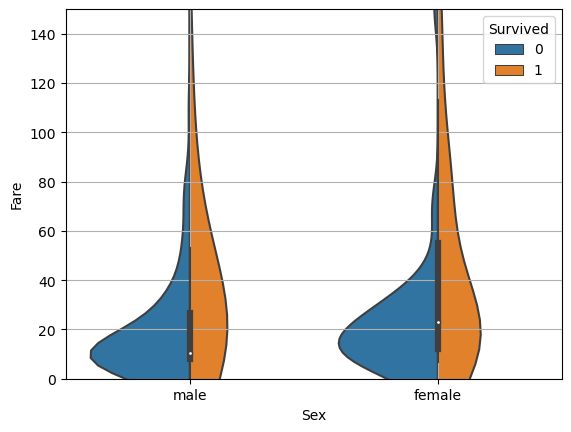

In [42]:
#X축 Sex, y축 Fare에 따른 바이올린 플롯 그려보기
sns.violinplot(data= train, x='Sex', y='Fare', hue='Survived', split=True)
plt.ylim(0,150) #시각화 범위 제한
plt.grid()

#상대적으로 요금이 낮은 사람들이 많이 사망함

###### 특성공학 : 새로운 컬럼 추출
- Parch : 함께 탑승한 부모자식의 수
- SibSp : 함께 탑승한 형제, 자매, 배우자의 수를 의미
- 위 두 개의 데이터를 확인했을 때 결국 비슷한 성격의 데이터(동승자 수 데이터)
- 부모자식, 형제자매, 배우자에 대한 컬럼 합쳐서 가족 수라는 새로운 컬럼 생성
- 주의점 : 반드시 train과 test 둘 다 적용을 해 주어야

In [43]:
#두 개의 컬럼을 더해서 가족의 수 'Family_Size'컬럼 생성
train['Family_Size'] = train['Parch'] + train['SibSp'] +1 #+1은 1인가구(나 자신을 더해주기!)
test['Family_Size'] = test['Parch'] + test['SibSp'] +1

<Axes: xlabel='Family_Size', ylabel='count'>

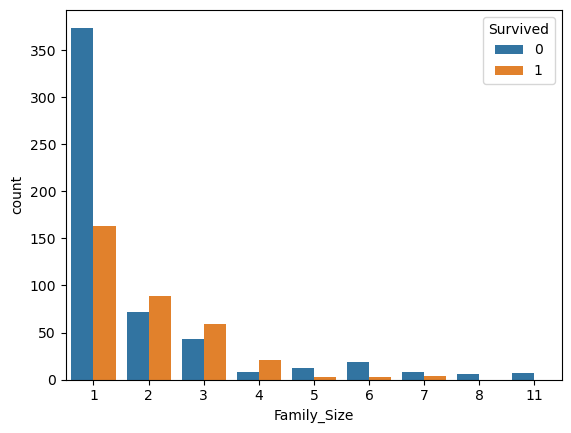

In [44]:
#Family_Size 데이터 시각화

sns.countplot(data = train, x='Family_Size', hue = 'Survived')

#1명일 때 사망비율 높다
#2~4명일 때 생존비율 높다
#5명 이상일 때 사망비율 높다

#같은 패턴을 가진 데이터들은 각자 학습시키지 않고 묶어서 학습시키는 것이 효율적.
#범주를 조절해 주면 사소한 관찰의 오류를 줄여준다!

In [45]:
#카테고리화 함수 cut 활용하여 묶어주기
#가족의 수1 : 'Alone', 2~4 : 'Small', 5~ : 'Large'
#train, test 둘 다 적용

b = [0,1,4,11] 
#구간설정 : 앞숫자 더하기 1부터 뒤숫자까지 범위를 나눔(즉 앞숫자 불포함 뒤숫자 포함)
l = ['Alone','Small','Large'] #각 구간별 이름 설정


#각각에 대해 대입해 주기
train['Family_Size'] = pd.cut(train['Family_Size'],bins=b, labels=l)
test['Family_Size'] = pd.cut(test['Family_Size'],bins=b, labels=l)

<Axes: xlabel='Family_Size', ylabel='count'>

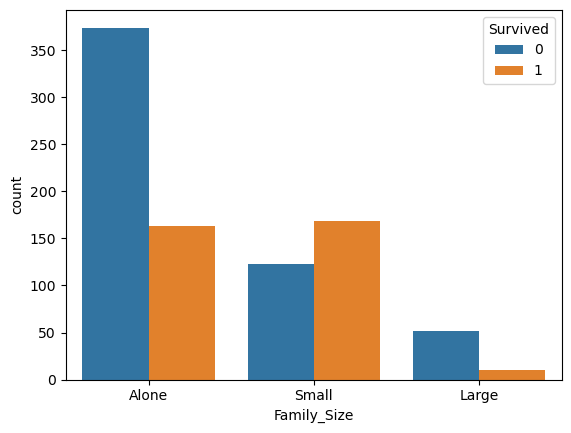

In [46]:
sns.countplot(data=train, x='Family_Size', hue='Survived')

In [47]:
train['Name']
#유의미한 데이터를 찾아낼 수 있을까?
#호칭?

PassengerId
1                                Braund, Mr. Owen Harris
2      Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                 Heikkinen, Miss. Laina
4           Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                               Allen, Mr. William Henry
                             ...                        
887                                Montvila, Rev. Juozas
888                         Graham, Miss. Margaret Edith
889             Johnston, Miss. Catherine Helen "Carrie"
890                                Behr, Mr. Karl Howell
891                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [48]:
#일단 첫 번째 한 사람만 보고 확인해 보자
train['Name'][1].split(',') #split : 표시한 문자열을 기준으로 대상 문자열 분리

['Braund', ' Mr. Owen Harris']

In [49]:
train['Name'][1].split(',')[1]

' Mr. Owen Harris'

In [50]:
train['Name'][1].split(',')[1].split('.')

[' Mr', ' Owen Harris']

In [51]:
train['Name'][1].split(',')[1].split('.')[0].strip() #strip() : 불필요한 공백 삭제

#호칭 추출 완료!

'Mr'

In [52]:
#모든 관측치에 적용하기 위해 함수화
def split_name(data):
    return data['Name'].split(',')[1].split('.')[0].strip()

#df에 적용할 함수는 위와 같이 하나의 데이터에 대해서 적용되는 형태를 짜야 한다.
#실제 모든 데이터에 적용하는 건 apply 함수가 하는 거다.

In [53]:
#apply 함수를 적용하여 train, test 데이터에 적용
#'Title'(호칭) 컬럼 생성해서 대입

#apply()함수 적용법 : 데이터.apply(함수명, 축(옵션))
train['Title']= train.apply(split_name, axis = 1)
test['Title']= test.apply(split_name, axis = 1)


#만일 위 함수에서 return data.split(',')[1].split('.')[0].strip()와 같이 썼다면
#train['Title'] = train['Name'].apply(split_name)의 형태로 써줘야 한다.
#이렇게 했을 경우 DF에서 한 개의 컬럼만을 출력하므로 Series : 축 설정 해줄 필요 없다.

In [54]:
train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

(0.0, 10.0)

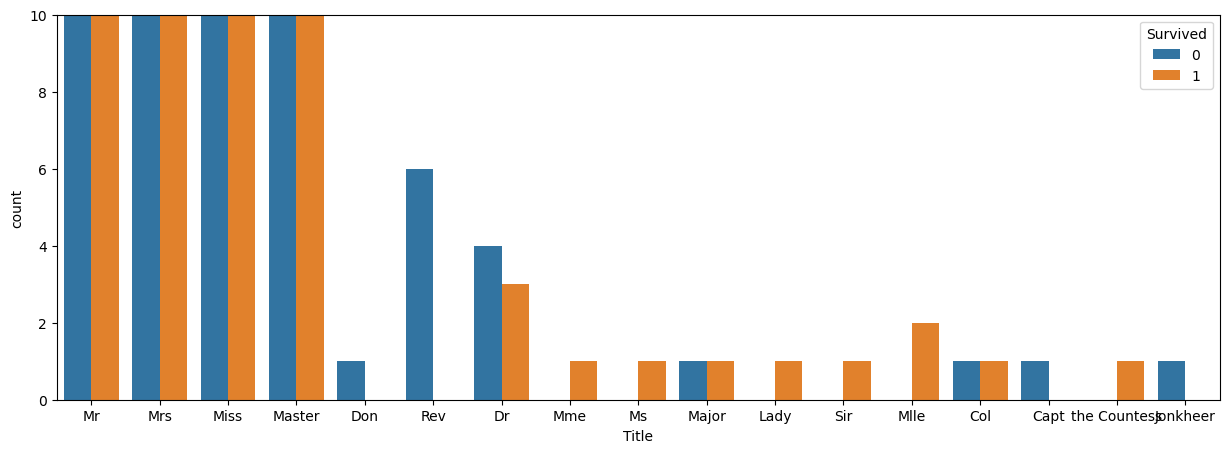

In [55]:
plt.figure(figsize=(15,5))
sns.countplot(data = train, x='Title', hue='Survived')
#데이터가 작으면 잘 안 보임

plt.ylim(0,10)


- 개수가 많은 특징이 있는 데이터를 제외하고는 Others라고 하는 그룹으로 묶어주기

In [56]:
train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [57]:
title = ['Mr', 'Mrs', 'Miss', 'Master','Rev','Don','Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer']
len(title)

17

In [58]:
#중요한 앞의 5개 데이터를 제외하고 나머지는 Others로 변환
convert_title = ['Mr', 'Mrs', 'Miss', 'Master','Rev'] + ['Others']*12
convert_title

['Mr',
 'Mrs',
 'Miss',
 'Master',
 'Rev',
 'Others',
 'Others',
 'Others',
 'Others',
 'Others',
 'Others',
 'Others',
 'Others',
 'Others',
 'Others',
 'Others',
 'Others']

In [59]:
#zip() : 리스트형태 2개의 데이터를 맵핑
#딕셔너리 형태로 연결(키, 밸류)
title_dict = dict(zip(title,convert_title))
title_dict

{'Mr': 'Mr',
 'Mrs': 'Mrs',
 'Miss': 'Miss',
 'Master': 'Master',
 'Rev': 'Rev',
 'Don': 'Others',
 'Dr': 'Others',
 'Mme': 'Others',
 'Ms': 'Others',
 'Major': 'Others',
 'Lady': 'Others',
 'Sir': 'Others',
 'Mlle': 'Others',
 'Col': 'Others',
 'Capt': 'Others',
 'the Countess': 'Others',
 'Jonkheer': 'Others'}

In [60]:
#map() : key 값에 맞는 value 값으로 짝지어 변경해 주는 함수
train['Title'] = train['Title'].map(title_dict)
#test['Title'] = test['Title'].map(title_dict)

In [61]:
train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Others', 'Rev'], dtype=object)

In [62]:
test['Title'].unique()
#test 데이터에만 있는 호칭 'Dona'>nan 값으로 변환

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

In [63]:
#Dona 호칭에 Other를 맵핑해 주기 위해 추가 - 위는 주석으로 만들고 다시 전부 재실행
#이렇게 번거로운 재실행 안 하려면 처음부터 train데이터와 test데이터의 차이 염두에 두어야
title_dict['Dona'] = 'Others'
test['Title'] = test['Title'].map(title_dict)

In [64]:
#만일 위와 같이 다시 전부 재실행하기 싫으면 아래처럼 해도 된다.
#test.loc[test['Title'].isnull(),'Title'] = 'Others'

In [65]:
test['Title'].unique()
train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Others', 'Rev'], dtype=object)

In [66]:
train['Ticket'].unique()
#의미 없다. Ticket데이터도 삭제

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

###### 필요없는 컬럼 삭제

- Name, SibSp, Parch, Ticket

In [67]:
train.drop(['Name','Ticket','SibSp','Parch'], axis = 1, inplace=True)
test.drop(['Name','Ticket','SibSp','Parch'], axis = 1, inplace=True)

In [68]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Survived     891 non-null    int64   
 1   Pclass       891 non-null    int64   
 2   Sex          891 non-null    object  
 3   Age          891 non-null    int64   
 4   Fare         891 non-null    float64 
 5   Embarked     891 non-null    object  
 6   Deck         891 non-null    object  
 7   Family_Size  891 non-null    category
 8   Title        891 non-null    object  
dtypes: category(1), float64(1), int64(3), object(4)
memory usage: 95.9+ KB


In [69]:
print(train.shape)
print(test.shape)

(891, 9)
(418, 8)


### 5. 모델 선택 및 하이퍼파라미터 설정

- 데이터 분리(문제, 정답)

In [70]:
#X_train (문제_Survived를 제외한 나머지)
#y_train (정답 -> Survived)
#X_test

#머신러닝에서 문제데이터는 언제나 2차원 정답데이터는 언제나 1차원
#만일 문제데이터에 컬럼이 하나더라도 DF로 만들어 주어야.

from sklearn.model_selection import train_test_split

X_train = train.drop('Survived', axis = 1)
y_train = train['Survived']
X_test = test

In [71]:
#크기 확인
print(X_train.shape, y_train.shape)
print(X_test.shape)

(891, 8) (891,)
(418, 8)


In [72]:
X_train.info()
#문자열 형태의 데이터를 수치형으로 변경

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Pclass       891 non-null    int64   
 1   Sex          891 non-null    object  
 2   Age          891 non-null    int64   
 3   Fare         891 non-null    float64 
 4   Embarked     891 non-null    object  
 5   Deck         891 non-null    object  
 6   Family_Size  891 non-null    category
 7   Title        891 non-null    object  
dtypes: category(1), float64(1), int64(2), object(4)
memory usage: 89.0+ KB


In [73]:
# 원핫인코딩
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [74]:
#크기확인
print(X_train.shape)
print(X_test.shape)

#컬럼 데이터가 같지 않다. 왜?


(891, 26)
(418, 25)


In [75]:
#인코딩 후 X_train, X_test 컬럼 수 차이
#머신러닝 학습을 위해서는 컬럼의 순서와 개수를 맞춰 주어야 한다

#set() : 중복이 없는 요소들만 값으로 구성
#값으로 구성하므로 연산이 가능
set(X_train.columns) - set(X_test.columns)

{'Deck_T'}

In [76]:
#X_train에는 존재하지만 X_test에는 존재하지 않는 'Deck_T'컬럼
#X_test에 'Deck_T' 컬럼 추가
#컬럼은 새로 만들지만 해당자가 없으므로 전부 0 값을 준다.
X_test['Deck_T'] = 0

In [77]:
#크기확인
print(X_train.shape)
print(X_test.shape)

(891, 26)
(418, 26)


In [78]:
X_train.columns

Index(['Pclass', 'Age', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D',
       'Deck_E', 'Deck_F', 'Deck_G', 'Deck_M', 'Deck_T', 'Family_Size_Alone',
       'Family_Size_Small', 'Family_Size_Large', 'Title_Master', 'Title_Miss',
       'Title_Mr', 'Title_Mrs', 'Title_Others', 'Title_Rev'],
      dtype='object')

In [79]:
X_test.columns

Index(['Pclass', 'Age', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D',
       'Deck_E', 'Deck_F', 'Deck_G', 'Deck_M', 'Family_Size_Alone',
       'Family_Size_Small', 'Family_Size_Large', 'Title_Master', 'Title_Miss',
       'Title_Mr', 'Title_Mrs', 'Title_Others', 'Title_Rev', 'Deck_T'],
      dtype='object')

In [80]:
#기계학습을 위해 컬럼들 순서도 맞춰 주어야. Deck_T가 새로 생성되면서 컬럼들 순서가 안 맞게 되었다.
#X_train에 있는 Deck_T 값을 마지막으로 옮겨주자!

temp = X_train['Deck_T'] #임시 변수에 Deck_T를 담아줌

In [81]:
#원래 있는 X_train의 'Deck_T'삭제
X_train.drop('Deck_T', axis = 1, inplace=True) 

In [82]:
#다시 Deck_T에 넣어주기
X_train['Deck_T'] = temp

In [83]:
#최종확인
X_train.info()
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pclass             891 non-null    int64  
 1   Age                891 non-null    int64  
 2   Fare               891 non-null    float64
 3   Sex_female         891 non-null    bool   
 4   Sex_male           891 non-null    bool   
 5   Embarked_C         891 non-null    bool   
 6   Embarked_Q         891 non-null    bool   
 7   Embarked_S         891 non-null    bool   
 8   Deck_A             891 non-null    bool   
 9   Deck_B             891 non-null    bool   
 10  Deck_C             891 non-null    bool   
 11  Deck_D             891 non-null    bool   
 12  Deck_E             891 non-null    bool   
 13  Deck_F             891 non-null    bool   
 14  Deck_G             891 non-null    bool   
 15  Deck_M             891 non-null    bool   
 16  Family_Size_Alone  891 non-null

### 6. 모델 학습

- 모델학습
    - KNN 모델
    - 의사결정나무 모델
    

In [84]:
#KNN 모델 학습_하이퍼파라미터 조절 X
#교차검증
#결과(knn_pre)

#문제발생시 X_train.values, X_test.values 등으로 입력하자.

from sklearn.neighbors import KNeighborsClassifier #KNN 분류모델 불러오기
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import cross_val_score #교차검증 도구 -> 일반화 확인

#KNN 모델 객체 생성
knn_model = KNeighborsClassifier()

#모델 학습
knn_model.fit(X_train, y_train)
#교차검증. 문제데이터 X_train 혹은 X_train.values
cross_val_score(knn_model, X_train, y_train, cv=5)
cross_val_score(knn_model, X_train, y_train, cv=5).mean()

0.7104764296026616

```python
비록 모델이 X_train, y_train을 가지고 학습했더라도 정확히 1:1 대응을 하는 게 아니라
특성을 기준으로 학습시키는 것이기 때문에 이렇게 하더라도 꼭 1 값이 나오는 건 아니다.
다만 교차검증하는 것보다는 아무래도 값이 높게 나온다.
그러니까 굳이 이렇게 할 필요는 없음. 다만 원리 이해 도움 되라고 놔둠.
knn_train_pred = knn_model.predict(X_train)

accuracy_score(y_train,knn_train_pred)
```

In [85]:
#최종 결과
knn_pre = knn_model.predict(X_test)

In [86]:
#decision tree 모델 학습_하이퍼파라미터 조절 X
#결과(tree_pre)

from sklearn.tree import DecisionTreeClassifier #의사결정나무 분류모델 불러오기

tree_model = DecisionTreeClassifier(max_depth = 4)
tree_model.fit(X_train,y_train)

cross_val_score(tree_model, X_train, y_train, cv=5 )
cross_val_score(tree_model, X_train, y_train, cv=5 ).mean()

0.8204067541271736

```python

이거도 위 백틱 먹인 마크다운 셀과 같다

tree_train_pred = tree_model.predict(X_train)
accuracy_score(y_train,tree_train_pred)
```

In [87]:
#최종 결과
tree_pre = tree_model.predict(X_test)

### 7. 모델 평가

In [88]:
#kaggle 제출방법 설명
#gender_sumission.csv 파일 읽어온 뒤 변수에 담아주기
result_sub = pd.read_csv('data/titanic_gender_submission.csv')

#이게 바로 답안지 파일 => 여기에 우리가 예측한 값을 넣어주자!
result_sub


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [89]:
#Survived 컬럼에 우리가 예측한 정답 덮어 씌워주기
result_sub['Survived'] = knn_pre

In [90]:
#csv 파일로 저장하기
result_sub.to_csv('data/CKI_sub01.csv', index=False)

In [91]:
#Tree 모델도 위와 같디
result_sub['Survived'] = tree_pre

In [92]:
result_sub.to_csv('data/MCDC_sub02.csv', index=False)

In [93]:
#이제 만든 파일을 캐글의 해당 컴피티션(Titanic - Machine Learning from Disaster)에 올려주기

##### 성능 개선 사항
- 데이터 양을 늘리기 위해서 수집
- 전처리방식 수정
- 더 좋은 모델 사용
- 하이퍼파라미터 조절
- 범위조정(scale 조정)
    - 거리계산을 하는 knn 모델의 성능을 높이기 위해서 사용하는 방법
    - sklearn에서 제공하는 Scaler를 제공해 줌. 사용법만 알아두기!
        - 현역판정시 두 사람이 시력이 1.5 차이가 나는데 키가 5cm 차이가 난다면?
        - 실제로는 징집 여부에 시력이 더 중요한 팩터임에도 숫자가 키가 더 크므로 더 영향이 크다!
        - 이 경우 키의 단위를 cm가 아닌 m로 해 주면 가중치 조절 가능
        - 이 때 사용하는 게 Scaler!

In [94]:
#도구 불러오기
from sklearn.preprocessing import StandardScaler

In [95]:
#객체 생성
scaler = StandardScaler()

In [96]:
#스케일러 학습
scaler.fit(X_train)

StandardScaler()

In [97]:
#학습된 스케일러를 통해 데이터값의 범위를 "변환"
#X_train, X_test 모두
t_X_train = scaler.transform(X_train)
t_X_test = scaler.transform(X_test)

In [98]:
#transform된 데이터로 다시 학습
knn_model2 = KNeighborsClassifier()
knn_model2.fit(t_X_train,y_train)

KNeighborsClassifier()

In [99]:
#교차검증
cross_val_score(knn_model2,t_X_train,y_train,cv=5)
cross_val_score(knn_model2,t_X_train,y_train,cv=5).mean()

#위의 X_train, y_train으로 학습시킨 거에 비해 정확도가 무려 9% 가량 증가

0.809189630280585

In [100]:
knn_pre2 = knn_model2.predict(t_X_test)

In [101]:
result_sub['Survived'] = knn_pre2
result_sub.to_csv('data/MCDC_sub03_knn.csv',index=False)

### 앙상블 모델(Ensemble)
- Voting : 서로 다른 모델이 예측한 결과 투표를 통해 결정
    - 하드보팅 : 각 결과를 클래스값으로 출력해 다수결로 투표
    - 소프트보팅 : 각 결과를 확률로 출력해서 확률값의 평균을 다수결로 투표
- Bagging : 서로 같은 모델이 독립적으로 예측한 결과 투표를 통해 결정
    - ex) random forest 모델(랜덤으로 구성한 데이터셋으로 의사결정나무 예측)
- Boosting : 서로 같은 모델이 순차적으로 학습하여 오류를 개선하는 방식으로 결정

In [112]:
#모델 불러오기
from sklearn.ensemble import VotingClassifier


In [103]:
#Voting 모델 사용
#estimators=[]안에 사용하려는 모델들 집어넣기


voting_model = VotingClassifier(estimators=[('knn1',knn_model), #()안의 knn1은 그냥 라벨 달아준 것
                              ('tree1',tree_model),
                              ('knn2',knn_model2)]) 

In [104]:
#교차검증
voting_model.fit(t_X_train,y_train)


VotingClassifier(estimators=[('knn1', KNeighborsClassifier()),
                             ('tree1', DecisionTreeClassifier(max_depth=4)),
                             ('knn2', KNeighborsClassifier())])

In [106]:
cross_val_score(voting_model,t_X_train,y_train).mean()

0.809189630280585

#### Bagging
- 랜덤포레스트(Random Forest)

In [107]:
from sklearn.ensemble import RandomForestClassifier

In [108]:
forest_model = RandomForestClassifier(n_estimators=100, random_state =15) 
#n_estimators : 사용할 나무의 개수

In [110]:
#성능확인(교차검증)
from sklearn.model_selection import cross_val_score

cross_val_score(forest_model, X_train,y_train,cv=5).mean()

0.8058313979034587

#### Boosting
- AdaBoost

In [113]:
from sklearn.ensemble import AdaBoostClassifier

In [116]:
#객체 생성
ada_model = AdaBoostClassifier(n_estimators= 100, random_state=15)

In [117]:
cross_val_score(ada_model,X_train,y_train, cv=5).mean()

0.8182160567447117

### GridSearchCV
- sklearn에서 제공해 주는 모델 성능 개선 함수
- 사용자가 모델선택, 하이퍼파라미터 선택
- 함수가 순차적으로 모든 경우의 수를 계산하여 최적의 하이퍼파라미터를 제시해 주는 방법
     #### 최적의 하이퍼파라미터 찾아주는 도구!

In [118]:
from sklearn.model_selection import GridSearchCV

In [119]:
# 1. 하이퍼 파라미터의 경우의 수 설정
# 딕셔너리 형태로 지정

params = {'n_estimators':[50,100,150,200],
         'max_depth':[3,4,5,7,9],
         'max_leaf_nodes':[2,5,10],
         'min_samples_split':[3,4,5,7],
         'min_samples_leaf':[1,2,4,6]}

#2. 대상모델 설정

test_model = RandomForestClassifier(random_state=15) 
#경우의 수에 따라 하이퍼파라미터가 계속 변경되므로 데이터를 
#고정해 주기 위해 random_state로 랜덤수를 고정해주는 것

#3. 대상모델에게 GridSearch 진행
grid = GridSearchCV(test_model, params, cv=5, scoring='accuracy') 
#scoring='accuracy' : 모델의 평가지표로서 정확도(accuracy)를 쓰겠다는 뜻

#4. 실행

grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=15),
             param_grid={'max_depth': [3, 4, 5, 7, 9],
                         'max_leaf_nodes': [2, 5, 10],
                         'min_samples_leaf': [1, 2, 4, 6],
                         'min_samples_split': [3, 4, 5, 7],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='accuracy')

In [120]:
#최적의 하이퍼파라미터 조합 및 정확도 확인
print('최적의 하이퍼파라미터 조합 : ', grid.best_params_)
print('최고의 정확도 : ', grid.best_score_)

최적의 하이퍼파라미터 조합 :  {'max_depth': 5, 'max_leaf_nodes': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
최고의 정확도 :  0.8316301550436258


In [126]:
#주의!
#최적의 하이퍼파라미터를 찾은 것이지 모델에 학습시킨 것은 아니므로 반드시 학습 진행 해주어야

best_model = RandomForestClassifier(n_estimators = 200,
                       max_depth = 5,
                       max_leaf_nodes = 10,
                       min_samples_split = 5,
                       min_samples_leaf = 1)

In [128]:
cross_val_score(best_model,X_train,y_train).mean()

0.8316238779737619